In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [40]:
data = pd.read_csv('../Datasets/Social_Network_Ads.csv')
data.drop(['User ID', 'Gender'], axis=1, inplace=True)
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [41]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

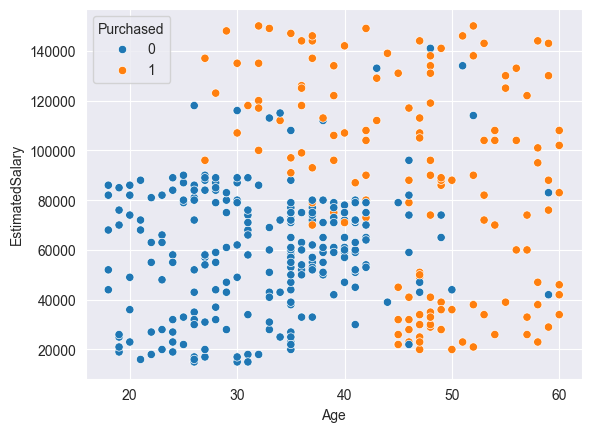

In [42]:
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=data)

In [43]:
x = data.iloc[:, :-1]
y = data["Purchased"]

# Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc = StandardScaler()
sc.fit(x)

StandardScaler()

In [46]:
x = pd.DataFrame(sc.transform(x), columns=x.columns)

# Train Test Spliting

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [63]:
dt.score(x_test, y_test)*100, dt.score(x_train, y_train)*100

(91.25, 91.875)

# Plotting Tree

In [64]:
from sklearn.tree import plot_tree

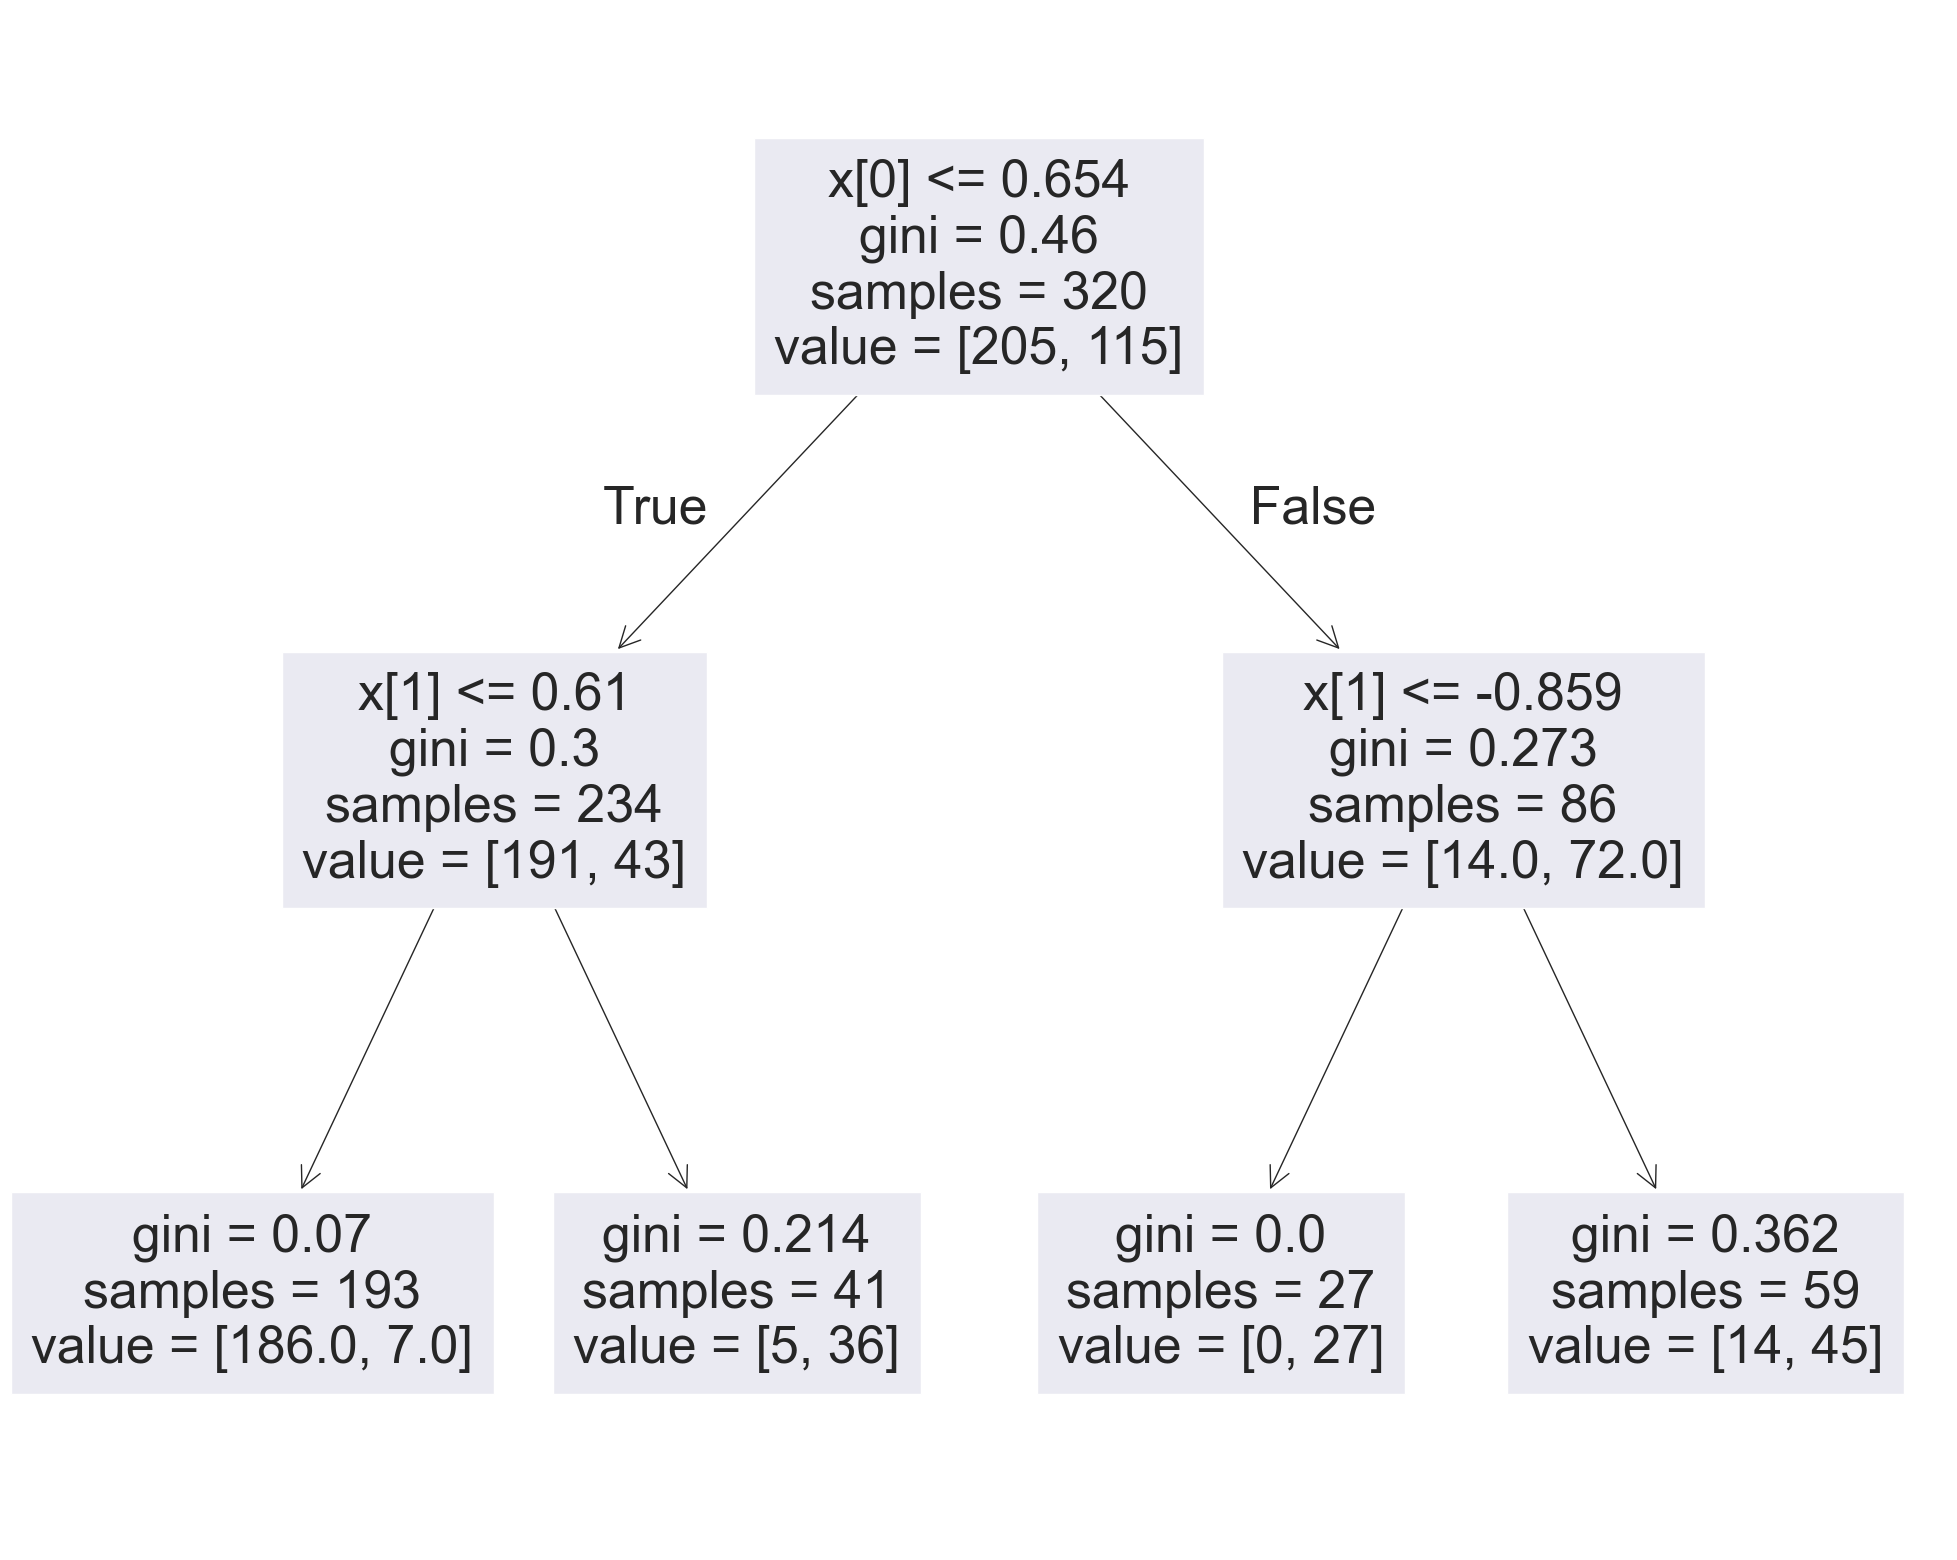

In [65]:
plt.figure(figsize=(25, 20))
plot_tree(dt)
plt.show()

C:\Users\Muhammad Taha\PycharmProjects\NAVTTC Artificial Intelligence\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


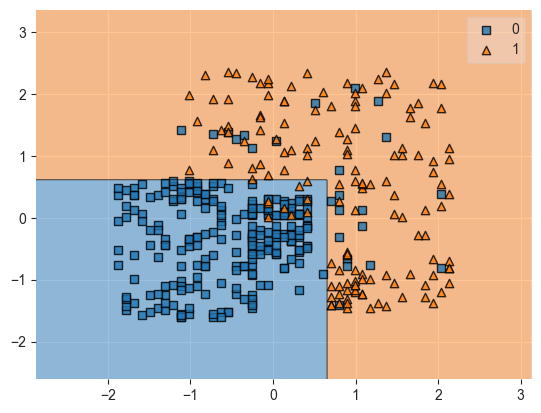

In [66]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt)
plt.show()

In [61]:
for i in range(1, 20):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train, y_train)
    print(dt2.score(x_train, y_train)*100, dt2.score(x_test, y_test)*100, i)

82.1875 90.0 1
91.875 91.25 2
91.875 91.25 3
93.125 91.25 4
93.4375 90.0 5
95.0 86.25 6
96.875 85.0 7
97.5 85.0 8
98.125 85.0 9
98.4375 85.0 10
99.0625 83.75 11
99.375 83.75 12
99.375 83.75 13
99.6875 83.75 14
99.6875 83.75 15
99.6875 83.75 16
99.6875 83.75 17
99.6875 83.75 18
99.6875 83.75 19
